In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import os

# Preparing Data

In [3]:
file_path = 'Tropics_tp&cape_5*5.nc'
#Opening dataset for tropics                                   
dsT = xr.open_dataset(file_path)

#Averging daily data across lat and lon for tropics
avg_dsT = dsT.mean(dim=['latitude', 'longitude'])    


# Obtaining 95th quantile precipitation events

In [7]:
#Finding top 5% precipitation events for tropics
precip = avg_dsT['tp']*24000                                        #Converting precipitation units to mm/day
precip1 = precip.where(precip >= 1)                                 #Making sure only positive precipitation values are considered
thresholdT = precip1.quantile(0.95)                                    
top_eventsT = avg_dsT.where(precip1 >= thresholdT, drop=True)


# Obtained time series around the 95th quantile events

In [8]:
#Create a time series of lenght SL around the top events obtained earlier
Sl = 19            
x = (Sl - 1) // 2
n = avg_dsT.sizes['time']
events = []

for i in range(x, n - x):
    if np.any(avg_dsT['time'][i] == top_eventsT['time']):
        l1 = avg_dsT['cape'][i - x : i + x + 1]
        l2 = avg_dsT['tp'][i - x : i + x + 1]
        combined_array = np.vstack((l1, l2))
        events.append(combined_array)

#Finding the mean of the of the time series array
events_array = np.array(events)
mean_of_events = np.mean(events_array, axis=0)



# Creating plot

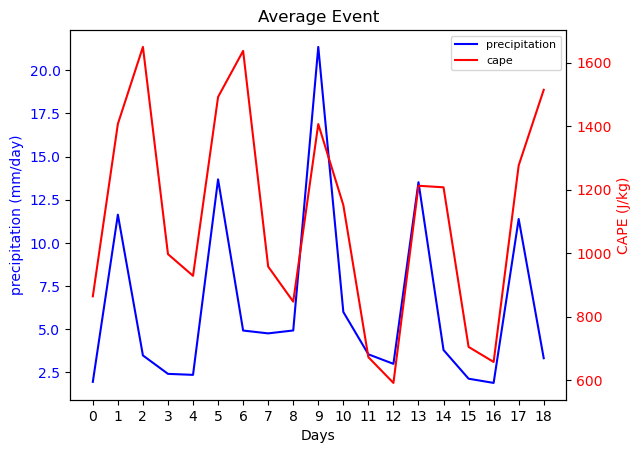

In [9]:

labels = [str(i) for i in range(19)]  # Generate labels from "0" to "46"

# Create the first subplot for 'tp'
fig, ax1 = plt.subplots()
ax1.plot(labels, mean_of_events[1]*22000, 'b-', label='precipitation')
ax1.set_xlabel('Days')
ax1.set_ylabel('precipitation (mm/day)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second subplot for 'cape' on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(labels, mean_of_events[0], 'r-', label='cape')
ax2.set_ylabel('CAPE (J/kg)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend for both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=8)

plt.title('Average Event')  # Add a title to the plot

plt.show()

# Time series examination

The analysis reveals a lead time in CAPE changes, as the maximum CAPE occurs before the peak precipitation, and a substantial portion of CAPE is utilized during the day of maximum precipitation, leading to a noticeable dip in CAPE